In [1]:
import pandas as pd
unkai_df = pd.read_csv("./全部.csv", header=1)
#unkai_df.head()

In [2]:
target_df = unkai_df.loc[unkai_df["閾値40"] == "空振り"]
target_df.head()

,日付,出現,確率,閾値40,閾値50,閾値60,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,2006/7/1,×,60%,空振り,空振り,空振り,雲海は4:30で消滅,NaN,NaN,NaN,NaN,NaN
5,2006/7/6,×,60%,空振り,空振り,空振り,4:00に出現、その後雲中,NaN,NaN,NaN,NaN,NaN
9,2006/7/10,×,90%,空振り,空振り,空振り,霧の中,NaN,NaN,NaN,NaN,NaN
13,2006/7/14,×,50%,空振り,空振り,適中なし,霧、朝一多少あり,NaN,NaN,NaN,NaN,NaN
14,2006/7/15,×,40%,空振り,適中なし,適中なし,霧、気球中止のせいか客は多い,NaN,NaN,NaN,NaN,NaN


In [3]:
target_dates = target_df["日付"].to_numpy()

In [4]:
def inquire_grib_data(path):
    import pygrib                  # gribファイルの中身を見たい場合はinquire_grib_data(path)を実行                
    grbs = pygrib.open(path)
    for grb in grbs:
        print(grb)
    return
def read_grib_data(path,name=None,level=None):
    import numpy as np
    import pygrib                   # pygribは!pip3 install pygrib --userでインストール
    grbs = pygrib.open(path)

    if name != None:                # anl_surf125に対しては変数名を与える
        alines = grbs.select(name=name)
    elif level != None:             # anl_p125に対しては気圧面を与えるとその水平面データ
        alines = grbs.select(level=level)
    else:                           #                  気圧面を与えないと全３次元データ
        alines = grbs.select()

    lat, lon = alines[0].latlons()  # lonは経度、latは緯度データ: (ny,nx)の２次元格子です
    ny, nx = lat.shape
    nline = len(alines)
    gdata = np.empty( (nline,ny,nx), dtype = "f4" )
    levels = np.empty( (nline), dtype = "f4" )
    for iline, aline in enumerate(alines):
        gdata[iline,:,:] = aline.values[::-1,:]
        levels[iline] = aline["level"]

    return lon, lat[::-1], level, gdata 

In [5]:
import datetime as dt
import calendar as cal
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

dts1=[]
for m in range(12):
    month=m+1
    nmonth=cal.monthrange(2006,month)[1]
    dts1.extend([dt.datetime(2006,month,1,0)+dt.timedelta(hours=6*i) for i in range(nmonth*4)])  #一年分の平均
dts2=[]  
for m in range(12):
    month=m+1
    nmonth=cal.monthrange(2007,month)[1]
    dts2.extend([dt.datetime(2007,month,1,0)+dt.timedelta(hours=6*i) for i in range(nmonth*4)])  #一年分の平均    
dts3=[] 
for m in range(12):
    month=m+1
    nmonth=cal.monthrange(2008,month)[1]
    dts3.extend([dt.datetime(2008,month,1,0)+dt.timedelta(hours=6*i) for i in range(nmonth*4)])  #一年分の平均
dts4=[]  
for m in range(12):
    month=m+1
    nmonth=cal.monthrange(2009,month)[1]
    dts4.extend([dt.datetime(2009,month,1,0)+dt.timedelta(hours=6*i) for i in range(nmonth*4)])  #一年分の平均 
dts5=[]  
for m in range(12):
    month=m+1
    nmonth=cal.monthrange(2010,month)[1]
    dts5.extend([dt.datetime(2010,month,1,0)+dt.timedelta(hours=6*i) for i in range(nmonth*4)])  #一年分の平均    
dts6=[]  
for m in range(12):
    month=m+1
    nmonth=cal.monthrange(2011,month)[1]
    dts6.extend([dt.datetime(2011,month,1,0)+dt.timedelta(hours=6*i) for i in range(nmonth*4)])  #一年分の平均    
dts7=[]  
for m in range(12):
    month=m+1
    nmonth=cal.monthrange(2012,month)[1]
    dts7.extend([dt.datetime(2012,month,1,0)+dt.timedelta(hours=6*i) for i in range(nmonth*4)])  #一年分の平均    
dts8=[]  
for m in range(12):
    month=m+1
    nmonth=cal.monthrange(2013,month)[1]
    dts8.extend([dt.datetime(2013,month,1,0)+dt.timedelta(hours=6*i) for i in range(nmonth*4)])  #一年分の平均    
dts9=[]  
for m in range(12):
    month=m+1
    nmonth=cal.monthrange(2014,month)[1]
    dts9.extend([dt.datetime(2014,month,1,0)+dt.timedelta(hours=6*i) for i in range(nmonth*4)])  #一年分の平均    
dts10=[]  
for m in range(12):
    month=m+1
    nmonth=cal.monthrange(2015,month)[1]
    dts10.extend([dt.datetime(2015,month,1,0)+dt.timedelta(hours=6*i) for i in range(nmonth*4)])  #一年分の平均  
dts11=[]  
for m in range(12):
    month=m+1
    nmonth=cal.monthrange(2016,month)[1]
    dts11.extend([dt.datetime(2016,month,1,0)+dt.timedelta(hours=6*i) for i in range(nmonth*4)])  #一年分の平均   
dts12=[]  
for m in range(12):
    month=m+1
    nmonth=cal.monthrange(2017,month)[1]
    dts12.extend([dt.datetime(2017,month,1,0)+dt.timedelta(hours=6*i) for i in range(nmonth*4)])  #一年分の平均   
dts13=[]  
for m in range(12):
    month=m+1
    nmonth=cal.monthrange(2018,month)[1]
    dts13.extend([dt.datetime(2018,month,1,0)+dt.timedelta(hours=6*i) for i in range(nmonth*4)])  #一年分の平均   
dts14=[]  
for m in range(12):
    month=m+1
    nmonth=cal.monthrange(2019,month)[1]
    dts14.extend([dt.datetime(2019,month,1,0)+dt.timedelta(hours=6*i) for i in range(nmonth*4)])  #一年分の平均   
dts15=[]  
for m in range(12):
    month=m+1
    nmonth=cal.monthrange(2020,month)[1]
    dts15.extend([dt.datetime(2020,month,1,0)+dt.timedelta(hours=6*i) for i in range(nmonth*4)])  #一年分の平均   
dts16=[]  
for m in range(12):
    month=m+1
    nmonth=cal.monthrange(2021,month)[1]
    dts16.extend([dt.datetime(2021,month,1,0)+dt.timedelta(hours=6*i) for i in range(nmonth*4)])  #一年分の平均 
    
dts_SUM=dts1+dts2+dts3+dts4+dts5+dts6+dts7+dts8+dts9+dts10+dts11+dts12+dts13+dts14+dts15+dts16


parameter_counts = 4
slpm=np.zeros((len(dts_SUM),145,288, parameter_counts))

#slpm[target_idxes, :, :] /= 100

for i,dt in enumerate(dts_SUM):
    fdir = "/mnt/hwmet-hdd01/Database/JRA55/anl_p125/"
    fname = "/anl_surf125."
    path=dt.strftime(fdir+"%Y%m"+fname+"%Y%m%d%H")
    lon,lat,_,SLP0=read_grib_data(path,name="Mean sea level pressure")
    lon,lat,_, u_wind = read_grib_data(path, name="10 metre U wind component")
    lon,lat,_, v_wind = read_grib_data(path,name="10 metre V wind component")
    slpm[i, :, :, 1] = SLP0
    slpm[i, :, :, 2] = u_wind
    slpm[i, :, :, 3] = v_wind
    #slpm[i,:,:]=SLP0
    

    
target_idxes = []
for idx, d in enumerate(dts_SUM):
    string_dt = f"{d.year}/{d.month}/{d.day}"
    if string_dt in target_dates:
#         print(idx, string_dt)
        target_idxes.append(idx)

#slpm[target_idxes, :, :] /= 100
slpm[target_idxes, :, :, 1] /= 100

/home/konagai/.local/lib/python3.6/site-packages/pyproj/__init__.py:76: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [6]:
mean = np.mean(slpm[target_idxes, :, :, 1], axis=0)

In [7]:
mean2 = np.mean(slpm[target_idxes, :, :, 2], axis=0)

In [8]:
mean3 = np.mean(slpm[target_idxes, :, :, 3], axis=0)

980.323953783884 1040.8457440700286


/home/konagai/.local/lib/python3.6/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/konagai/.local/lib/python3.6/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/konagai/.local/lib/python3.6/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/konagai/.local/lib/python3.6/site-packages/cartopy/crs.py:385: ShapelyDep

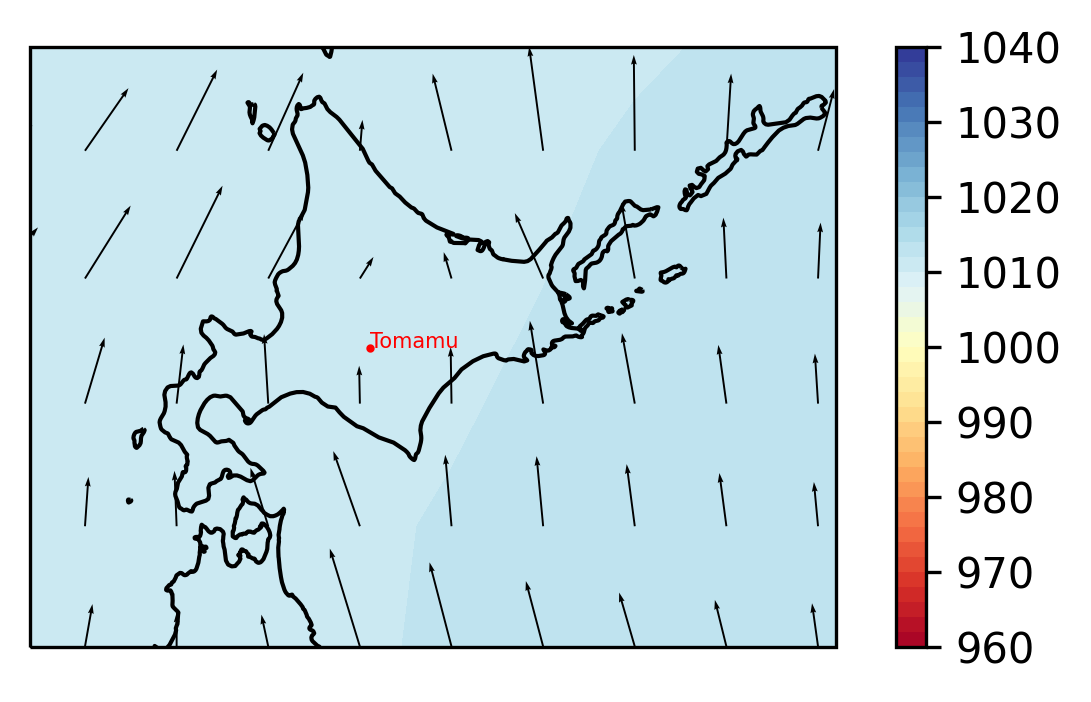

In [9]:
def draw_graph(xmesh,ymesh,topo_data):
    import numpy as np
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    fig = plt.figure( figsize = (5,2.5), dpi = 300 )
    proj = ccrs.Mercator(central_longitude=140)
    proj_cart = ccrs.PlateCarree()
    ax = plt.axes((0.1,0.1,0.8,0.8), projection=proj)
    ax.set_extent([120,160,25,50],crs=proj_cart)
#   ax.set_extent([-179.99,180,-80,80],crs=proj_cart)
    ax.coastlines()
    
    C = ax.contourf(xmesh,ymesh,topo_data,cmap="RdYlBu",transform=proj_cart)
    fig.colorbar(C)
    return ax

# ax = draw_graph(lon,lat,mean)

xmesh, ymesh, topo_data = lon, lat, mean 

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure( figsize = (5,2.5), dpi = 300 )
proj = ccrs.Mercator(central_longitude=140)
proj_cart = ccrs.PlateCarree()
ax = plt.axes((0.1,0.1,0.8,0.8), projection=proj)
ax.set_extent([138,149,40,46],crs=proj_cart)
ax.coastlines()

lat_tomamu = 43.0631836
lon_tomamu = 142.6316828
ax.plot(lon_tomamu, lat_tomamu, 'o', transform=ccrs.PlateCarree(),markersize=1, color='r')
plt.text(lon_tomamu, lat_tomamu, 'Tomamu', size=5, color='red',horizontalalignment='left', transform=ccrs.PlateCarree())

# fig.savefig("適中の日の平均風向")

###等高線と色付け
# Cmap: RdYlBu
min_press, max_press = topo_data.min(), topo_data.max()
print(min_press, max_press)
levels = np.arange(960.0, 1040.1, 2.0)
C = ax.contourf(xmesh,ymesh,topo_data, levels=levels, cmap="RdYlBu",transform=proj_cart)
fig.colorbar(C)
colors = ['black']
# mappable = ax.contour(lon,lat,mean,levels=levels, colors=["black"], extend='both', transform=ccrs.PlateCarree())
# 等圧線の数値表示
# ax.clabel(mappable, fontsize=2, fmt="%4.0f", inline=False)

###風
ax.quiver(lon, lat, mean2, mean3, scale=5, scale_units="inches", transform=ccrs.PlateCarree())


ax.set_extent([138,149,40,46],crs=proj_cart)
# ax.gridlines(draw_labels=True)
plt.savefig("空振り天気図.png")
plt.show()
plt.close()
#draw_graph(lon,lat,mean)